In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.feature_selection import RFE

In [2]:
train = pd.read_csv("I:/train.csv")
test = pd.read_csv("I:/test.csv")
train_notarget = train.drop(["Survived"], axis=1)
complete = train_notarget.append(test, ignore_index=True)

# Veri temizliği

In [3]:
#Yaştaki NaN değerleri veri setinin yaş ortalamasıyla doldurmak ideal gibi

#Kabin kolonunu düşürmek gerek, herhangi bir imputation metodu uygulamak için çok az kullanılabilir veri var

#Embarked kolonundaki iki NaN satırı düşürmek gerek
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
train.dropna(subset=["Embarked"], inplace=True)
train.drop("Cabin", axis=1, inplace=True)

In [7]:
#Yaş sütunu hariç her sütunda 889 satır var, Age sütununu da ortalamalarla doldurunca 889 olacak
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [8]:
#Yaş sütununu da ortalama yaşı kullanarak doldurdum
mean_age = train.Age.mean()
train.fillna(value=mean_age, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [9]:
#Object veri tiplerini int64'e çevirerek matematiksel işlem yapılabilecek hale getirelim
train.replace({"male":0, "female":1}, inplace = True)
train.replace({"S":0, "C":1, "Q":2}, inplace = True)

In [10]:
#Yolcu isimleri ve bilet kodları algoritma tarafından kullanılabilecek sayısal girdilere çevrilemez, bu yüzden düşürülmesi gerek.
#Ayrıca PassengerId sütununun da her ne kadar int64 olsa da yorumlanabilir bir sayısal değer olmamasından ötürü düşürülmesi şart.
train.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [11]:
#Veri temiz ve işlenmeye hazır duruyor.
train.info()
train.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# Feature engineering

In [12]:
#Kadınlar ve çocuklar daha fazla hayatta kaldığından 
#yaş ortalamasının altındaki kadınları gösteren bir kolon
#belki bir şeyler anlatabilir.
train["Young_Female"] = (train["Age"] <= train.Age.mean()) & (train["Sex"] == 1)
train["Young_Female"].fillna(value=0, inplace=True)
train["Young_Female"] = train["Young_Female"].astype("int64")
for i in train["Young_Female"]:
    i = int(i)
    if i != train.Young_Female.isnull().any():
        train["Young_Female"].replace({i:1})
train.Young_Female.value_counts()

0    742
1    147
Name: Young_Female, dtype: int64

In [13]:
#Yukarıdaki hücre ile aynı işlem sayılır, yalnızca "ve" operatörünü "veya" ile
#değiştirdim. Yani gemidekilerin ortalama yaşında ya da ortalamadan daha genç
#kişiler veya kadın olanları barındıran bir kolon ekledim. Hedef kolon olan
#Survived kolonu ile arasında %87'lik korelasyon çıktı. Modelde kullanılması
#şart olan bir kolon.
train["young_or_female"] = (train["Age"] <= train.Age.mean()) | (train["Sex"] == 1)
train["young_or_female"].fillna(value=0, inplace=True)
train["young_or_female"] = train["young_or_female"].astype("int64")
for i in train["young_or_female"]:
    i = int(i)
    if i != train.young_or_female.isnull().any():
        train["young_or_female"].replace({i:1})
train.young_or_female.value_counts()

1    549
0    340
Name: young_or_female, dtype: int64

In [14]:
#Gemide akrabası olanların yaşam oranıyla alakalı bir farklılık olabilir.
train["has_family"] = train["SibSp"] >= 0
train["has_family"].astype("int64")
train.has_family.value_counts()

True    889
Name: has_family, dtype: int64

In [15]:
#Aşağıda EDA yaparken fark ettim ki gemideki akraba sayısı 4'ten fazla olup da 
#hayatta kalan olmamış. Bu nedenle bu şartı sağlayan bir kolon yaratmayı denedim,
#fakat bunu karşılayan yalnızca 12 durum olduğundan pek işe yaramaz.
train["crowded_family"] = train["SibSp"] > 4
train["crowded_family"].fillna(value=0, inplace=True)
train["crowded_family"] = train["crowded_family"].astype("int64")
for i in train["crowded_family"]:
    i = int(i)
    if i != train.crowded_family.isnull().any():
        train["crowded_family"].replace({i:1})
train["crowded_family"].astype("int64")
train.crowded_family.value_counts()

0    877
1     12
Name: crowded_family, dtype: int64

In [16]:
#Yolcuların sınıfı ve yaşları arasında negatif bir korelasyon var, yani genç yolcular genelde
#daha alt sınıflardan bilet almışlar. Buna karşın, genç yolcuların gemiden öncelikli biçimde
#tahliye edildiği verisine de sahibiz. Bu çelişen iki girdiyi tek bir kolonda topladım.
train["age_and_class"] = (train["Age"] <= train.Age.mean()) | (train["Pclass"] == 1)
train["age_and_class"].fillna(value=0, inplace=True)
train["age_and_class"] = train["age_and_class"].astype("int64")
for i in train["age_and_class"]:
    i = int(i)
    if i != train.age_and_class.isnull().any():
        train["age_and_class"].replace({i:1})
train.age_and_class.value_counts()

1    543
0    346
Name: age_and_class, dtype: int64

In [17]:
#Yolcuların sınıfı ve yaşları arasında negatif bir korelasyon var, yani genç yolcular genelde
#daha alt sınıflardan bilet almışlar. Buna karşın, genç yolcuların gemiden öncelikli biçimde
#tahliye edildiği verisine de sahibiz. Bu çelişen iki girdiyi tek bir kolonda topladım.
train["embarkloc"] = (train["Embarked"] == 0)
train["embarkloc"].fillna(value=0, inplace=True)
train["embarkloc"] = train["embarkloc"].astype("int64")
for i in train["embarkloc"]:
    i = int(i)
    if i != train.embarkloc.isnull().any():
        train["embarkloc"].replace({i:1})
train.embarkloc.value_counts()

1    644
0    245
Name: embarkloc, dtype: int64

In [18]:
#Yolcuların sınıfı ve yaşları arasında negatif bir korelasyon var, yani genç yolcular genelde
#daha alt sınıflardan bilet almışlar. Buna karşın, genç yolcuların gemiden öncelikli biçimde
#tahliye edildiği verisine de sahibiz. Bu çelişen iki girdiyi tek bir kolonda topladım.
train["high_fare"] = (train["Fare"] >= train.Fare.mean()) | (train["Pclass"] == 1)
train["high_fare"].fillna(value=0, inplace=True)
train["high_fare"] = train["high_fare"].astype("int64")
for i in train["high_fare"]:
    i = int(i)
    if i != train.high_fare.isnull().any():
        train["high_fare"].replace({i:1})
train.high_fare.value_counts()

0    623
1    266
Name: high_fare, dtype: int64

# Veri görselleştirme

Text(0.5, 1.0, 'Kolonların korelasyon matrisi')

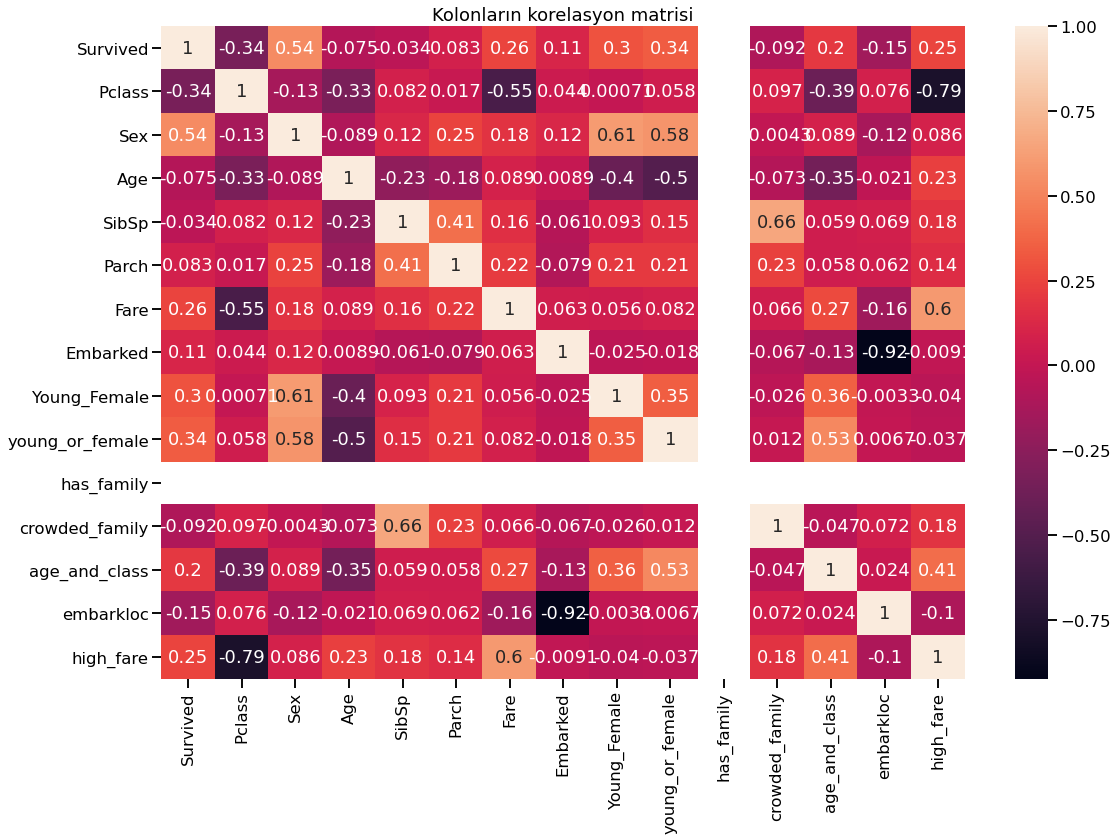

In [19]:
#Korelasyon matrisini çizelim
sns.set_context("talk")
ax = plt.subplots(figsize=(18, 12))
sns.heatmap(train.corr(), annot=True)
plt.title("Kolonların korelasyon matrisi")

[Text(0, 0, 'Dead'), Text(0, 0, 'Alive')]

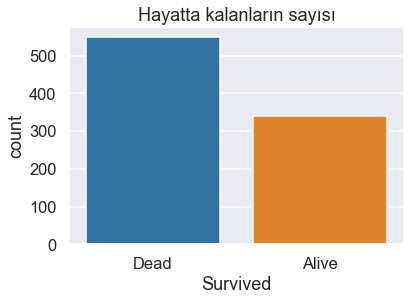

In [20]:
#Hayatta kalan ve ölenlerin sayısı
sns.set_context("talk")
sns.set_style("darkgrid")
g = sns.countplot("Survived", data=train)
plt.title("Hayatta kalanların sayısı")
g.set_xticklabels(["Dead", "Alive"])

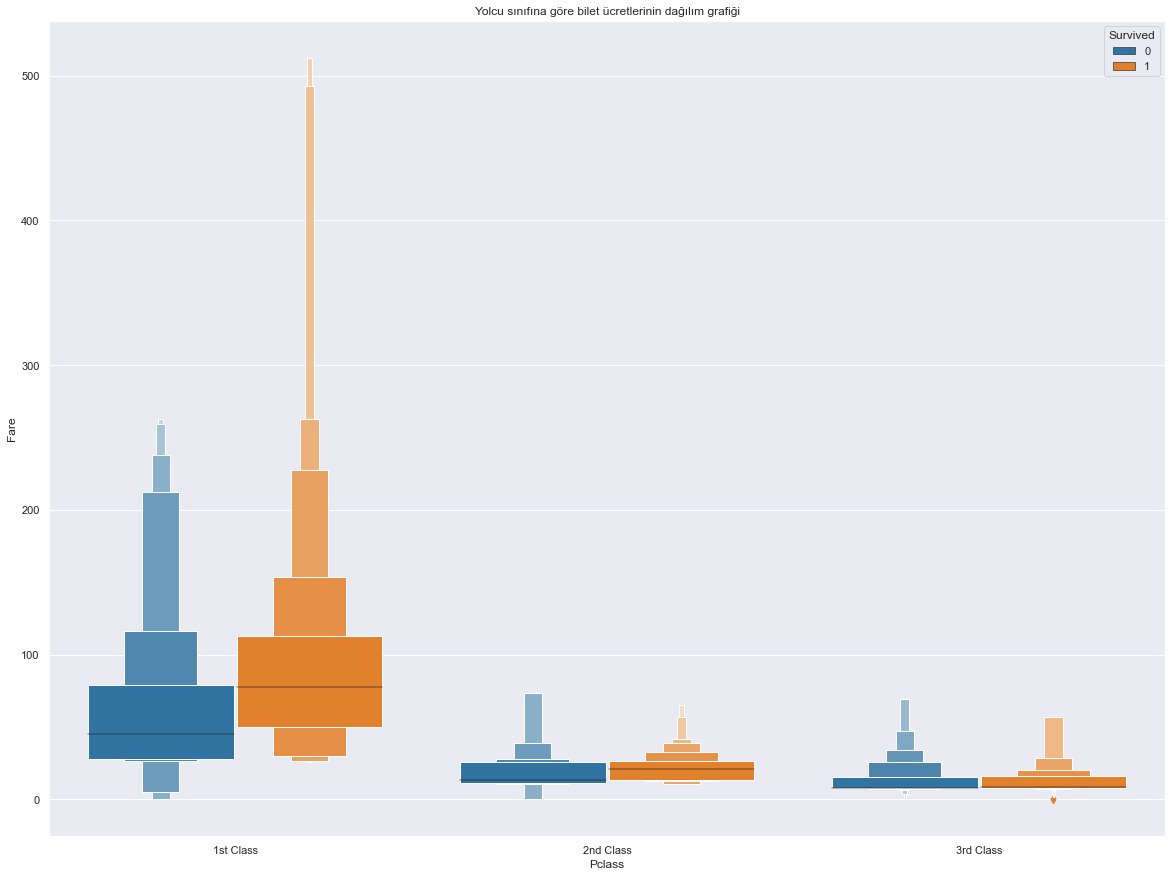

In [21]:
#Yolcuların hangi sınıfta seyahat ettiğine göre bilete ödedikleri ücretin dağılımını gösteren kutu grafiği
sns.set_context("notebook")
ax = plt.subplots(figsize=(20, 15))
g1 = sns.boxenplot("Pclass", "Fare", hue="Survived", data=train)
g1.set_xticklabels(["1st Class", "2nd Class", "3rd Class"])
plt.title("Yolcu sınıfına göre bilet ücretlerinin dağılım grafiği")
plt.show()

Text(0.5, 1.0, 'Yolcu sınıfına göre yolcuların ortalama hayatta kalma yüzdeleri')

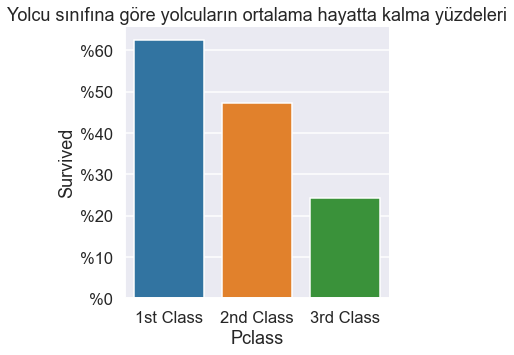

In [22]:
#Yolcuların seyahat sınıfına göre hayatta kalma yüzdeleri
sns.set_context("talk")
g = sns.catplot("Pclass", "Survived", data=train, kind="bar", ci=None)
g.set_yticklabels(["%0", "%10", "%20", "%30", "%40", "%50", "%60"])
g.set_xticklabels(["1st Class", "2nd Class", "3rd Class"])
plt.title("Yolcu sınıfına göre yolcuların ortalama hayatta kalma yüzdeleri")

Text(0.5, 1.0, 'Cinsiyete göre yolcuların ortalama hayatta kalma yüzdeleri')

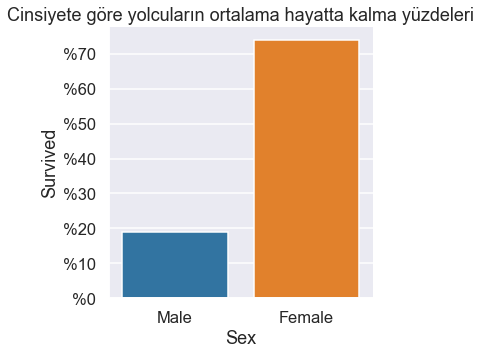

In [23]:
#Hayatta kalanların cinsiyete göre yüzdesel dağılımı
sns.set_context("talk")
g = sns.catplot("Sex", "Survived", data=train, kind="bar", ci=None)
g.set_yticklabels(["%0", "%10", "%20", "%30", "%40", "%50", "%60", "%70"])
g.set_xticklabels(["Male", "Female"])
plt.title("Cinsiyete göre yolcuların ortalama hayatta kalma yüzdeleri")

Text(0.5, 1.0, 'Hayatta kalıp kalmamalarına göre yolcuların yaş dağılımları')

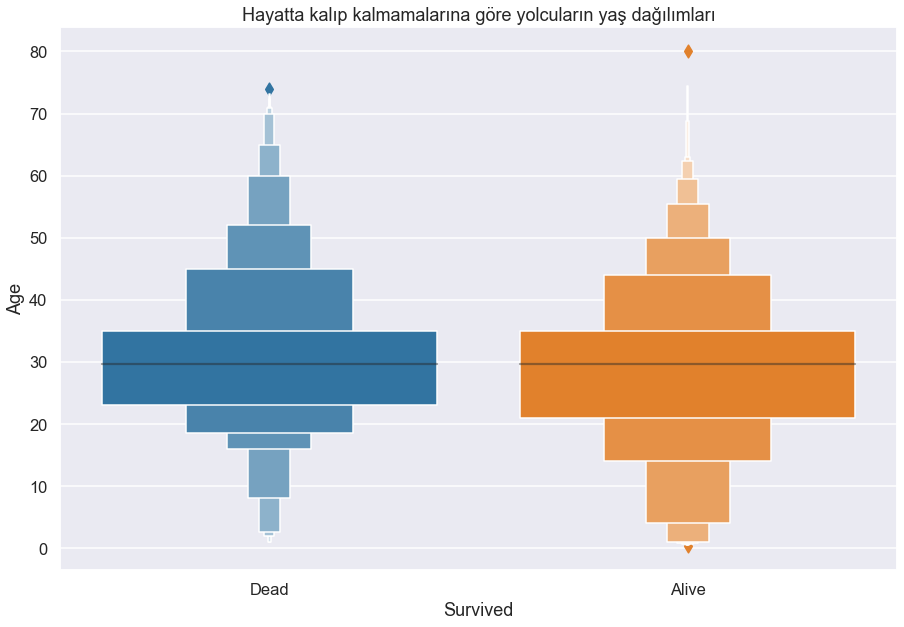

In [24]:
#Yolcuların hayatta kalma durumlarına göre yaşlarının dağılımını gösteren kutu grafiği
sns.set_context("talk")
ax = plt.subplots(figsize=(15, 10))
a = sns.boxenplot("Survived", "Age", data=train)
a.set_xticklabels(["Dead", "Alive"])
plt.title("Hayatta kalıp kalmamalarına göre yolcuların yaş dağılımları")

Text(0.5, 1.0, 'Hayatta kalıp kalmamalarına göre yolcuların gemideki akraba sayısı')

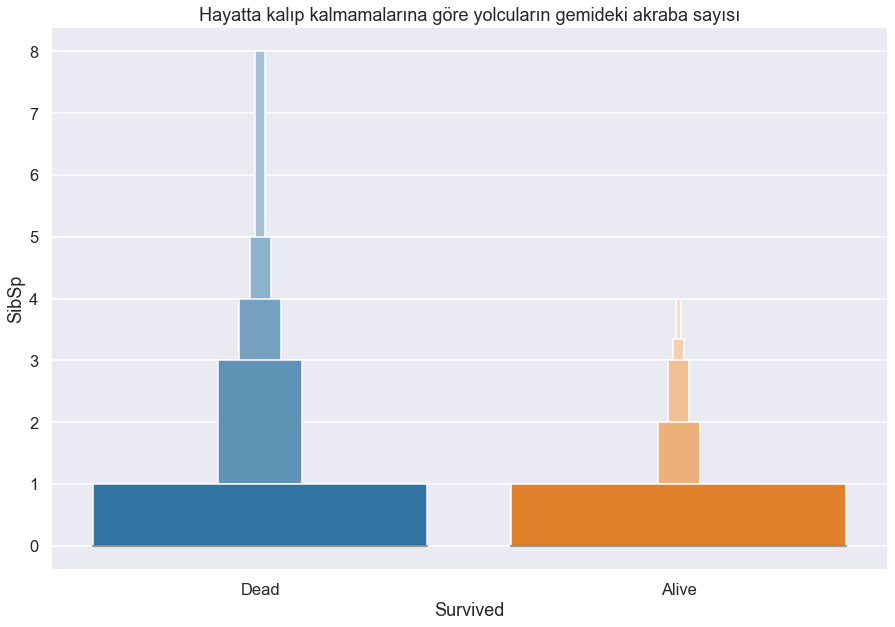

In [25]:
#Hayatta kalan ve ölen yolcuların gemideki akraba sayılarını gösteren kutu grafiği
sns.set_context("talk")
ax = plt.subplots(figsize=(15, 10))
a = sns.boxenplot("Survived", "SibSp", data=train)
a.set_xticklabels(["Dead", "Alive"])
plt.title("Hayatta kalıp kalmamalarına göre yolcuların gemideki akraba sayısı")

Text(0.5, 1.0, 'Hayatta kalıp kalmamalarına ve seyahat sınıflarına göre yolcuların gemideki akraba sayısı')

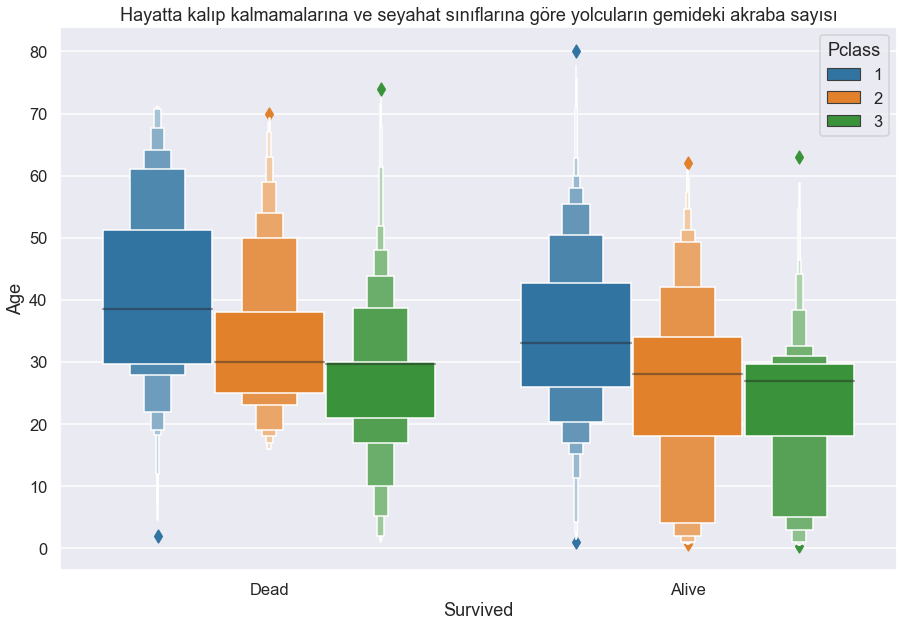

In [26]:
#Yolcuların seyahat sınıflarına ve hayatta kalıp kalmama durumlarına göre yaşlarının dağılımını gösteren kutu grafiği
sns.set_context("talk")
ax = plt.subplots(figsize=(15, 10))
a = sns.boxenplot("Survived", "Age", hue="Pclass", data=train)
a.set_xticklabels(["Dead", "Alive"])
plt.title("Hayatta kalıp kalmamalarına ve seyahat sınıflarına göre yolcuların gemideki akraba sayısı")

Text(0.5, 1.0, 'Gemiye bindikleri yere göre hayatta kalan kişi sayısı')

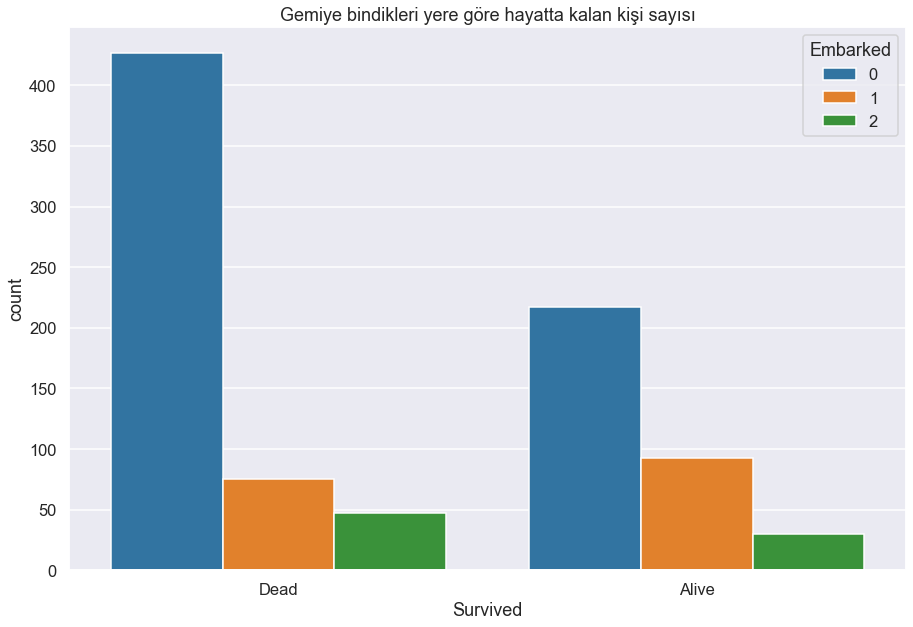

In [27]:
#Yolcuların seyahat sınıflarına ve hayatta kalıp kalmama durumlarına göre yaşlarının dağılımını gösteren kutu grafiği
sns.set_context("talk")
ax = plt.subplots(figsize=(15, 10))
a = sns.countplot("Survived", hue="Embarked", data=train)
a.set_xticklabels(["Dead", "Alive"])
plt.title("Gemiye bindikleri yere göre hayatta kalan kişi sayısı")

# Algoritmanın kurulması

In [28]:
#Veri setini X ve y şeklinde ayırarak tahmin edilecek değer olan Survived kolonunu ayıralım
X = train[["Fare", "Pclass", "Sex", "Age", "high_fare", "age_and_class", "Young_Female", "young_or_female"]]
y = np.array(train.Survived)
#Veriyi eğitim ve test setlerine bölelim 
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.3)
#Verideki değerleri standardize ederek modelin daha doğru tahminler yapmasını ve 
#sayısal değerlerin ağırlıklarını yanlış belirlemesini engelleyebiliriz.
rob_scaler = RobustScaler()
rob_x = rob_scaler.fit_transform(X_train)
rob_xtest = rob_scaler.transform(X_test)
minmax_scaler = MinMaxScaler()
minmax_x = minmax_scaler.fit_transform(X_train)
minmax_xtest = minmax_scaler.transform(X_test)
std_scaler = StandardScaler().fit(X_train)
standard_x = std_scaler.transform(X_train)
standard_xtest = std_scaler.transform(X_test)

In [29]:
#k-NN modelini kuralım
knn = KNeighborsClassifier()
#En iyi k-NN modelini belirlemek için 1'den 30'a kadar n_neighbors parametresine
#değerler atayarak en iyi parametreyi bulalım.
params = {"n_neighbors":np.arange(1, 31)}
grid_std = GridSearchCV(estimator = knn, param_grid = params, cv=5)
grid_std.fit(standard_x, y_train)
knn_pred_std = grid_std.predict(standard_xtest)
print(classification_report(y_test, knn_pred_std))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       167
           1       0.71      0.78      0.74       100

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



In [30]:
#En iyi k-NN modelini belirlemek için 1'den 30'a kadar n_neighbors parametresine
#değerler atayarak en iyi parametreyi bulalım.
params = {"n_neighbors":np.arange(1, 31)}
grid_minmax = GridSearchCV(estimator = knn, param_grid = params, cv=5)
grid_minmax.fit(minmax_x, y_train)
knn_pred_minmax = grid_minmax.predict(minmax_xtest)
print(classification_report(y_test, knn_pred_minmax))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       167
           1       0.72      0.74      0.73       100

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.80      0.79      0.79       267



In [31]:
#En iyi k-NN modelini belirlemek için 1'den 30'a kadar n_neighbors parametresine
#değerler atayarak en iyi parametreyi bulalım.
params = {"n_neighbors":np.arange(1, 31)}
grid_rob = GridSearchCV(estimator = knn, param_grid = params, cv=5)
grid_rob.fit(rob_x, y_train)
knn_pred_rob = grid_rob.predict(rob_xtest)
print(classification_report(y_test, knn_pred_rob))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       167
           1       0.81      0.65      0.72       100

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267



Text(0.5, 1.0, 'k-NN Algoritmasının Sınıflandırma Performansı')

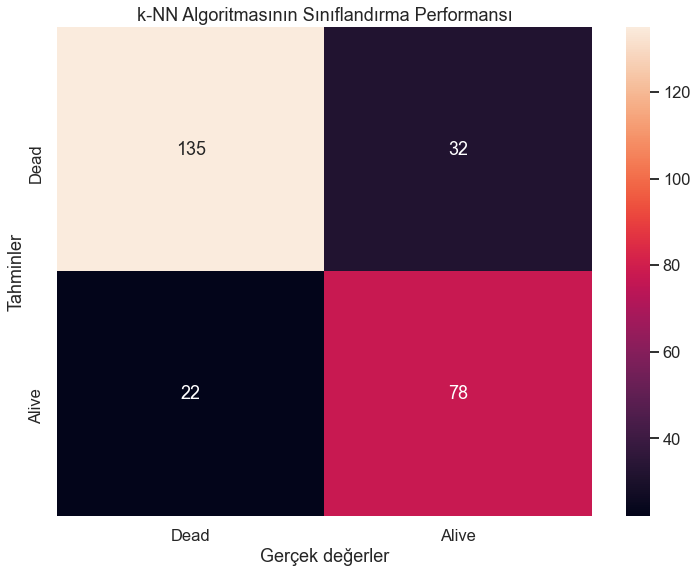

In [32]:
#k-NN modelinin hata matrisini çizelim.
ax = plt.subplots(figsize=(12, 9))
sns.heatmap(confusion_matrix(y_test, knn_pred_std), annot=True, xticklabels=["Dead", "Alive"], yticklabels=["Dead", "Alive"], fmt="g")
plt.ylabel("Tahminler")
plt.xlabel("Gerçek değerler")
plt.title("k-NN Algoritmasının Sınıflandırma Performansı")

Text(0.5, 1.0, 'k-NN Algoritmasının Sınıflandırma Performansı')

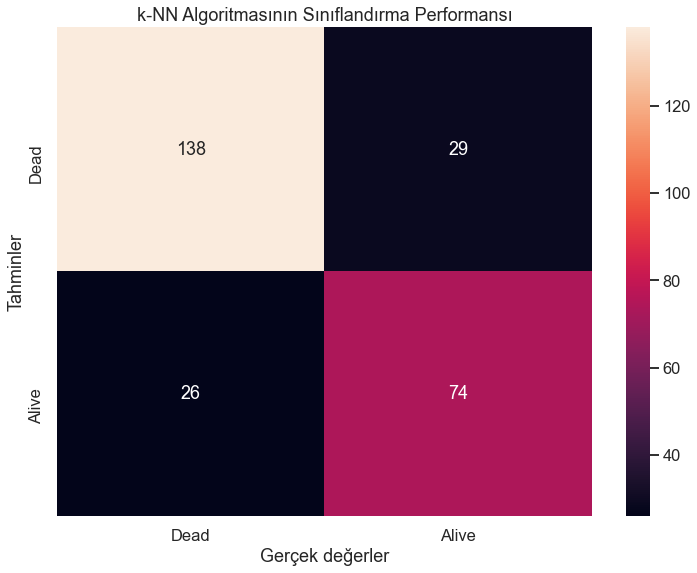

In [33]:
#k-NN modelinin hata matrisini çizelim.
ax = plt.subplots(figsize=(12, 9))
sns.heatmap(confusion_matrix(y_test, knn_pred_minmax), annot=True, xticklabels=["Dead", "Alive"], yticklabels=["Dead", "Alive"], fmt="g")
plt.ylabel("Tahminler")
plt.xlabel("Gerçek değerler")
plt.title("k-NN Algoritmasının Sınıflandırma Performansı")

Text(0.5, 1.0, 'k-NN Algoritmasının Sınıflandırma Performansı')

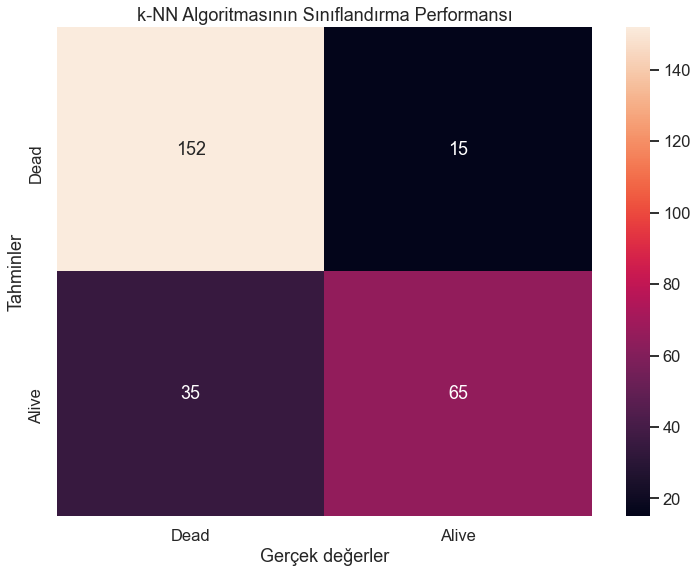

In [34]:
#k-NN modelinin hata matrisini çizelim.
ax = plt.subplots(figsize=(12, 9))
sns.heatmap(confusion_matrix(y_test, knn_pred_rob), annot=True, xticklabels=["Dead", "Alive"], yticklabels=["Dead", "Alive"], fmt="g")
plt.ylabel("Tahminler")
plt.xlabel("Gerçek değerler")
plt.title("k-NN Algoritmasının Sınıflandırma Performansı")

In [35]:
print("En yüksek puan (standardize, minmax, robust):", grid_std.best_score_, grid_minmax.best_score_, grid_rob.best_score_)
print("En iyi n_neighbors parametresi (standardize, minmax, robust):",grid_std.best_estimator_.n_neighbors, grid_minmax.best_estimator_.n_neighbors, grid_rob.best_estimator_.n_neighbors)
print("Ortalama model puanı (standardize, minmax, robust):", grid_std.cv_results_["mean_test_score"].mean(), grid_minmax.cv_results_["mean_test_score"].mean(), grid_rob.cv_results_["mean_test_score"].mean())

En yüksek puan (standardize, minmax, robust): 0.8054967741935484 0.7958193548387097 0.8021935483870968
En iyi n_neighbors parametresi (standardize, minmax, robust): 1 1 6
Ortalama model puanı (standardize, minmax, robust): 0.7797058064516129 0.7786120430107527 0.7816486021505377


In [36]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=3)
params_log = {"estimator__C":[0.0001, 0.001, 0.01, 0.1, 1, 1.2, 1.5, 1.8, 2, 2.2, 2.5, 2.7, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.9, 3, 3.1, 3.3, 3.5, 3.8, 10, 100]}
grid_log_std = GridSearchCV(estimator=rfe, param_grid = params_log, cv=5)
grid_log_std.fit(standard_x, y_train)
logreg_pred_std = grid_log_std.predict(standard_xtest)
print(classification_report(y_test, logreg_pred_std))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       167
           1       0.73      0.72      0.73       100

    accuracy                           0.80       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267



In [37]:
grid_log_minmax = GridSearchCV(estimator=rfe, param_grid = params_log, cv=5)
grid_log_minmax.fit(minmax_x, y_train)
logreg_pred_minmax = grid_log_minmax.predict(minmax_xtest)
print(classification_report(y_test, logreg_pred_minmax))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       167
           1       0.73      0.72      0.72       100

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



In [38]:
grid_log_rob = GridSearchCV(estimator=rfe, param_grid = params_log, cv=5)
grid_log_rob.fit(rob_x, y_train)
logreg_pred_rob = grid_log_rob.predict(rob_xtest)
print(classification_report(y_test, logreg_pred_rob))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       167
           1       0.71      0.76      0.73       100

    accuracy                           0.79       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.80      0.79      0.80       267



Text(0.5, 1.0, 'Lojistik Regresyon Algoritmasının Sınıflandırma Performansı')

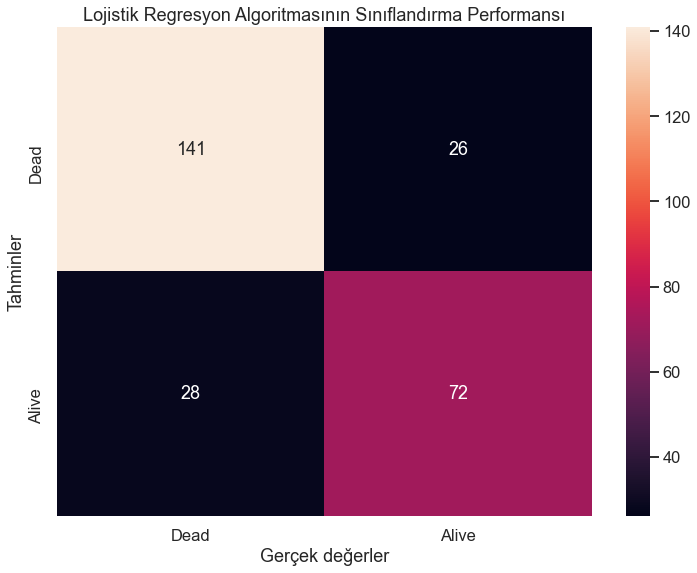

In [39]:
#Lojistik Regresyon modelinin hata matrisi
ax = plt.subplots(figsize=(12, 9))
sns.heatmap(confusion_matrix(y_test, logreg_pred_std), annot=True, xticklabels=["Dead", "Alive"], yticklabels=["Dead", "Alive"], fmt="g")
plt.ylabel("Tahminler")
plt.xlabel("Gerçek değerler")
plt.title("Lojistik Regresyon Algoritmasının Sınıflandırma Performansı")

Text(0.5, 1.0, 'Lojistik Regresyon Algoritmasının Sınıflandırma Performansı')

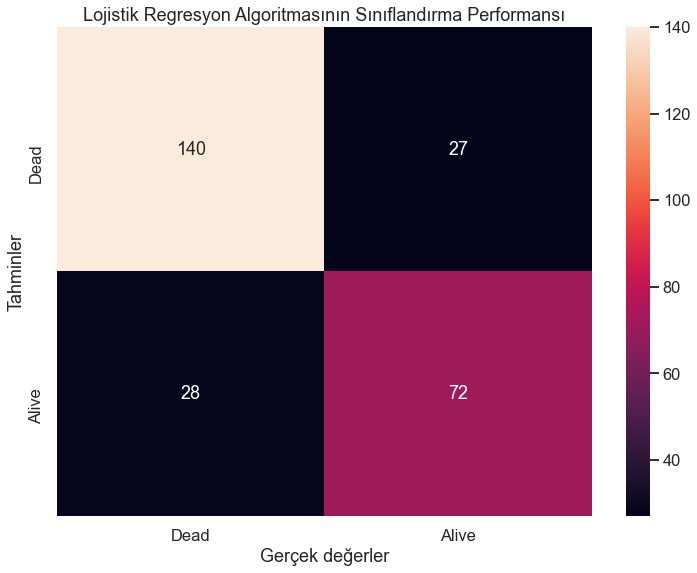

In [40]:
#Lojistik Regresyon modelinin hata matrisi
ax = plt.subplots(figsize=(12, 9))
sns.heatmap(confusion_matrix(y_test, logreg_pred_minmax), annot=True, xticklabels=["Dead", "Alive"], yticklabels=["Dead", "Alive"], fmt="g")
plt.ylabel("Tahminler")
plt.xlabel("Gerçek değerler")
plt.title("Lojistik Regresyon Algoritmasının Sınıflandırma Performansı")

Text(0.5, 1.0, 'Lojistik Regresyon Algoritmasının Sınıflandırma Performansı')

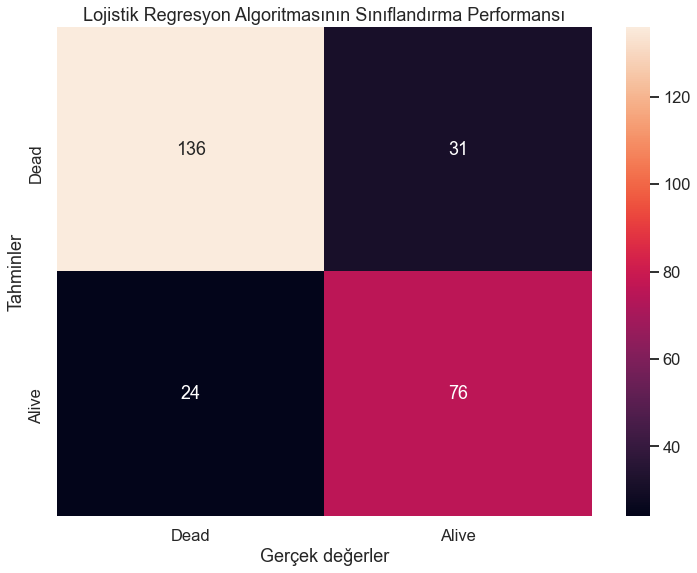

In [41]:
#Lojistik Regresyon modelinin hata matrisi
ax = plt.subplots(figsize=(12, 9))
sns.heatmap(confusion_matrix(y_test, logreg_pred_rob), annot=True, xticklabels=["Dead", "Alive"], yticklabels=["Dead", "Alive"], fmt="g")
plt.ylabel("Tahminler")
plt.xlabel("Gerçek değerler")
plt.title("Lojistik Regresyon Algoritmasının Sınıflandırma Performansı")

In [42]:
print("En yüksek puan (standardize, minmax, robust):", grid_log_std.best_score_, grid_log_minmax.best_score_, grid_log_rob.best_score_)
print("En iyi C parametresi (standardize, minmax, robust):",grid_log_std.best_estimator_.estimator_, grid_log_minmax.best_estimator_.estimator_, grid_log_rob.best_estimator_.estimator_)
print("Ortalama model puanı (standardize, minmax, robust):", grid_log_std.cv_results_["mean_test_score"].mean(), grid_log_minmax.cv_results_["mean_test_score"].mean(), grid_log_rob.cv_results_["mean_test_score"].mean())

En yüksek puan (standardize, minmax, robust): 0.7925032258064516 0.7909032258064517 0.7844516129032257
En iyi C parametresi (standardize, minmax, robust): LogisticRegression(C=0.1) LogisticRegression(C=1) LogisticRegression(C=0.1)
Ortalama model puanı (standardize, minmax, robust): 0.7716836320191158 0.7636587813620073 0.7644979689366787


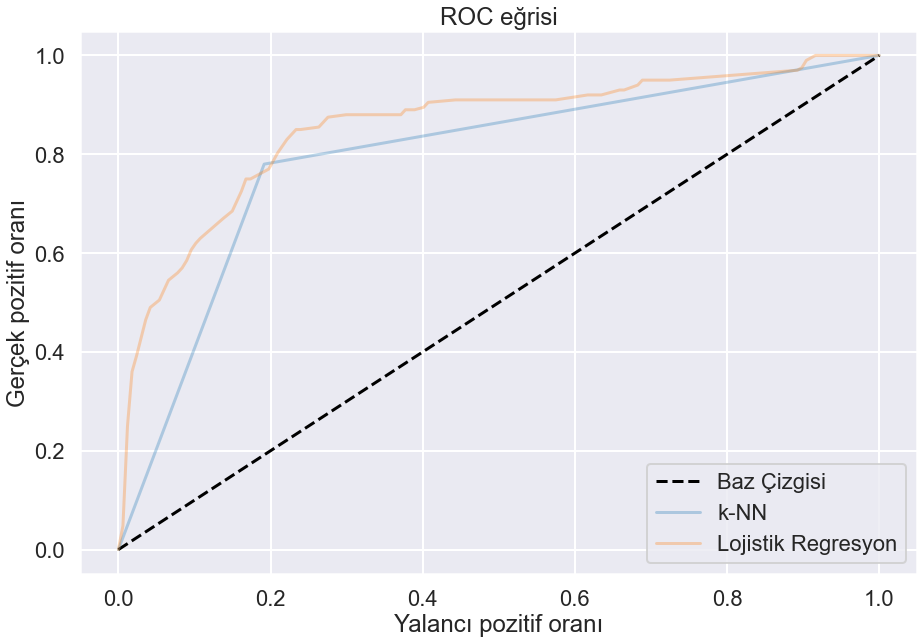

In [43]:
#Modellerin performansını daha iyi kıyaslayabilmek için ROC eğrisi çizelim
knn_prob = grid_std.predict_proba(standard_xtest)[:, 1]
logreg_prob = grid_log_std.predict_proba(standard_xtest)[:, 1]
fprlog, tprlog, thresholdslog = roc_curve(y_test, logreg_prob)
fpr, tpr, thresholds = roc_curve(y_test, knn_prob)
sns.set_style("darkgrid")
sns.set_context("poster")
ax = plt.subplots(figsize=(15, 10))
plt.plot([0, 1], [0, 1], 'k--')
sns.lineplot(fpr, tpr, alpha=0.3, ci=None)
sns.lineplot(fprlog, tprlog, alpha=0.3, ci=None)
plt.xlabel('Yalancı pozitif oranı')
plt.ylabel('Gerçek pozitif oranı')
plt.title('ROC eğrisi')
plt.legend(["Baz Çizgisi", "k-NN", "Lojistik Regresyon"])
plt.show()

## Test verisi üzerinde çalışma

In [44]:
#Yukarıda algoritmaları kurarken yapılanları etiketlenmemiş test.csv dosyası için tek adımda yapalım 
test.dropna(subset=["Embarked"], inplace=True)
test.drop("Cabin", axis=1, inplace=True)
mean_age_test = test.Age.mean()
test.fillna(value=mean_age_test, inplace=True)
test.replace({"male":0, "female":1}, inplace = True)
test.replace({"S":0, "C":1, "Q":2}, inplace = True)
test.drop(["Name", "Ticket"], axis=1, inplace=True)

In [45]:
test["young_or_female"] = (test["Age"] <= complete.Age.mean()) | (test["Sex"] == 1)
test["young_or_female"].fillna(value=0, inplace=True)
test["young_or_female"] = test["young_or_female"].astype("int64")
for i in test["young_or_female"]:
    i = int(i)
    if i != test.young_or_female.isnull().any():
        test["young_or_female"].replace({i:1})

In [46]:
test["has_family"] = test["SibSp"] >= 0
test["has_family"].astype("int64")

0      1
1      1
2      1
3      1
4      1
      ..
413    1
414    1
415    1
416    1
417    1
Name: has_family, Length: 418, dtype: int64

In [47]:
test["crowded_family"] = test["SibSp"] > complete.SibSp.mean()
test["crowded_family"].fillna(value=0, inplace=True)
test["crowded_family"] = test["crowded_family"].astype("int64")
for i in test["crowded_family"]:
    i = int(i)
    if i != test.crowded_family.isnull().any():
        test["crowded_family"].replace({i:1})
test["crowded_family"].astype("int64")

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    0
415    0
416    0
417    1
Name: crowded_family, Length: 418, dtype: int64

In [48]:
test["age_and_class"] = (test["Age"] <= complete.Age.mean()) | (test["Pclass"] == 1)
test["age_and_class"].fillna(value=0, inplace=True)
test["age_and_class"] = test["age_and_class"].astype("int64")
for i in test["age_and_class"]:
    i = int(i)
    if i != train.age_and_class.isnull().any():
        train["age_and_class"].replace({i:1})

In [49]:
#Yolcuların sınıfı ve yaşları arasında negatif bir korelasyon var, yani genç yolcular genelde
#daha alt sınıflardan bilet almışlar. Buna karşın, genç yolcuların gemiden öncelikli biçimde
#tahliye edildiği verisine de sahibiz. Bu çelişen iki girdiyi tek bir kolonda topladım.
test["embarkloc"] = test["Embarked"] == 0
test["embarkloc"].fillna(value=0, inplace=True)
test["embarkloc"] = test["embarkloc"].astype("int64")
for i in test["embarkloc"]:
    i = int(i)
    if i != test.embarkloc.isnull().any():
        test["embarkloc"].replace({i:1})
test.embarkloc.value_counts()

1    270
0    148
Name: embarkloc, dtype: int64

In [50]:
X = train[["Fare", "Pclass", "Sex", "Age", "has_family", "young_or_female", "age_and_class", "embarkloc"]]
y = np.array(train.Survived)
X_test = test[["Fare", "Pclass", "Sex", "Age", "has_family", "young_or_female", "age_and_class", "embarkloc"]]
scaler = StandardScaler().fit(X)
scaler_test = StandardScaler().fit(X_test)
standard_x = scaler.transform(X)
standard_test = scaler_test.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=1)
logreg = LogisticRegression(C=0.1)

logreg.fit(standard_x, y)
logreg_pred = logreg.predict(standard_test)
test["Survived"] = logreg_pred
test_logreg = test[["PassengerId", "Survived"]].astype("int64")
test_logreg.to_csv("titanic_logreg.csv", index=False)
knn.fit(standard_x, y)
knn_pred = knn.predict(standard_test)
test["Survived"] = knn_pred
test_knn = test[["PassengerId", "Survived"]].astype("int64")
test_knn.to_csv("titanic_knn.csv", index=False)